In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import matplotlib.pyplot as plt
import mechanics
import numpy as np

In [21]:
components = mechanics.Components()

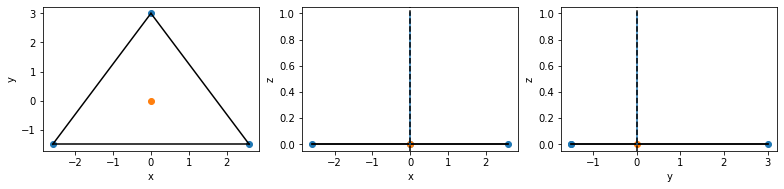

In [22]:
dx, dy = 0.5, 0.5
fig = plt.figure()
ax1 = fig.add_axes([0., 0., dx, dy])
components.plot_platform(ax1, axes=[0, 1])
ax2 = fig.add_axes([dx*1.2, 0., dx, dy])
components.plot_platform(ax2, axes=[0, 2])
ax3 = fig.add_axes([2*dx*1.2, 0., dx, dy])
components.plot_platform(ax3, axes=[1, 2])

In [23]:
components.attach_platform()

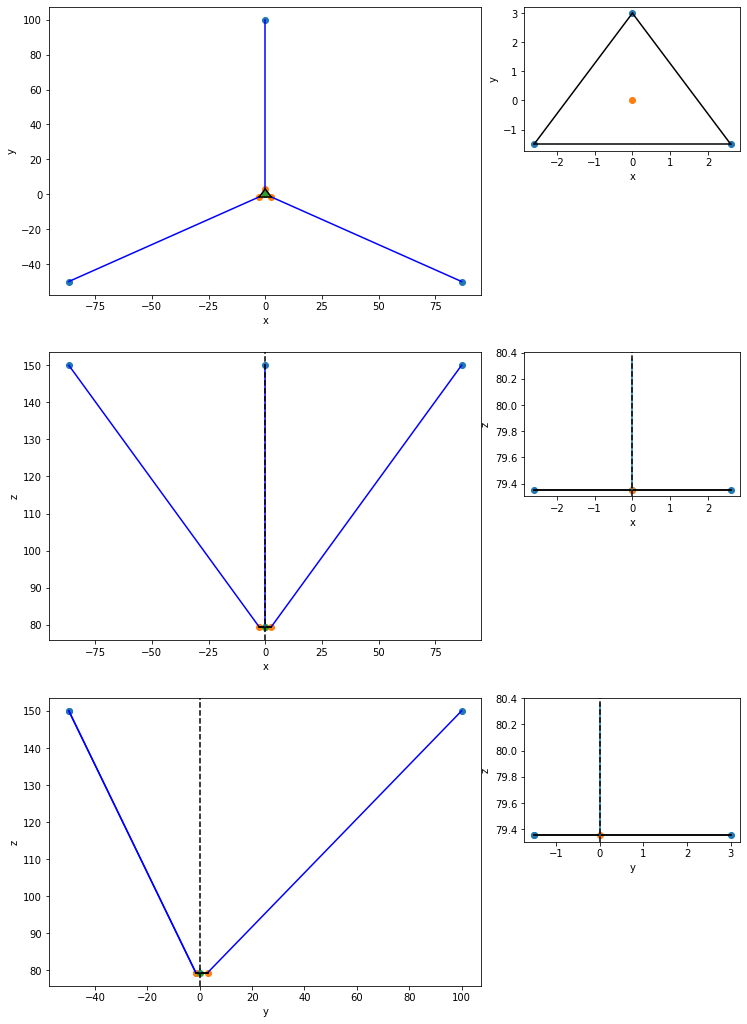

In [24]:
projections = [[0, 1], [0, 2], [1, 2]]
dx, dy = 1., 1.
dx2, dy2 = 0.5, 0.5
fig = plt.figure()
for i, p in enumerate(projections):
    ax1 = fig.add_axes([0., -1.2*dy*i, dx, dy])
    components.plot_anchor(ax1, axes=p)
    components.plot_platform(ax1, axes=p)
    ax2 = fig.add_axes([1.1*dx, 1.-dy2-1.2*dy*i, dx2, dy2])
    components.plot_platform(ax2, axes=p)

In [26]:
forces = mechanics.Forces()

In [31]:
t1, t2, t3 = forces.tensions_similar_triangles()
print('T1 = {:.2f} kg'.format(t1))
print('T2 = {:.2f} kg'.format(t2))
print('T3 = {:.2f} kg'.format(t3))

T1 = 1353.63 kg
T2 = 1353.63 kg
T3 = 1353.63 kg
